# Principal component analysis

We will demonstrate principal component analysis on a dataset for [abalone](https://en.wikipedia.org/wiki/Abalone). 

![Abalone image](https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/LivingAbalone.JPG/320px-LivingAbalone.JPG)

The data comes from <https://archive.ics.uci.edu/dataset/1/abalone>.

In [1]:
import numpy as np

We first fetch the datset and inspect it:

In [2]:
# https://archive.ics.uci.edu/dataset/1/abalone
try:
    import ucimlrepo
except ImportError:
    !pip install ucimlrepo

from ucimlrepo import fetch_ucirepo 
abalone = fetch_ucirepo(id=1) 

In [3]:
abalone.data.features 

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


Extract 2 of the features from the dataset:

In [4]:
data0 = abalone.data.features.Length
data1 = abalone.data.features.Height

# This can be interesting to try - we wouldn't expect a linear relationship between length and a weight
# data1 = abalone.data.features.Whole_weight

Create the $X$ data matrix and verify its shape:

In [5]:
X = np.column_stack((data0.values, data1.values))
X.shape

(4177, 2)

We create a scatter plot to visualise the data.

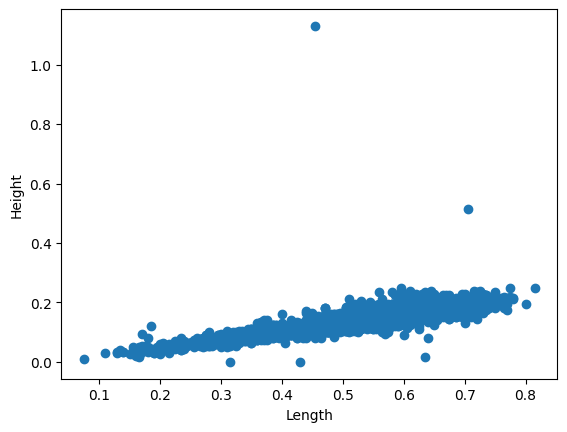

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])
plt.xlabel(data0.name)
plt.ylabel(data1.name)
plt.show()

To perform principal component analysis, we compute the (reduced) SVD for the matrix $X$.
Recall that $X = U \Sigma V^{H}$, where:
- the diagonal matrix $\Sigma$ holds the singular values (the square root of the  eigenvalues of $X^{T} X$);
- the columns of $U$ are the normalised eigenvectors of $XX^{T}$; and
- the columns of $V$ are the normalised eigenvectors of $X^{T} X$.

First we centre $X$ matrix (such that mean of each column zero) and verify:

In [7]:
C = np.identity(X.shape[0]) - np.ones((X.shape[0], X.shape[0]))/ X.shape[0]
Xc = C @ X
print("Test column means:", np.mean(Xc, 0))

Test column means: [ 1.65476921e-16 -5.53848989e-18]


Compute the singular value decomposition of the centred data matrix:

In [8]:
U, S, Vh = np.linalg.svd(Xc)

Checking the singular values:

In [9]:
print("Singular values:", S)

Singular values: [8.08786269 1.45600719]


As we could expect from the scatter plot the first singular value is several times larger than the second.

We now add the eigenvectors of $X^{T} X$ to the scatter plot, recalling that the eigenvectors of $X^{T} X$ 
are the rows of $V^{T}$ (`Vh`).

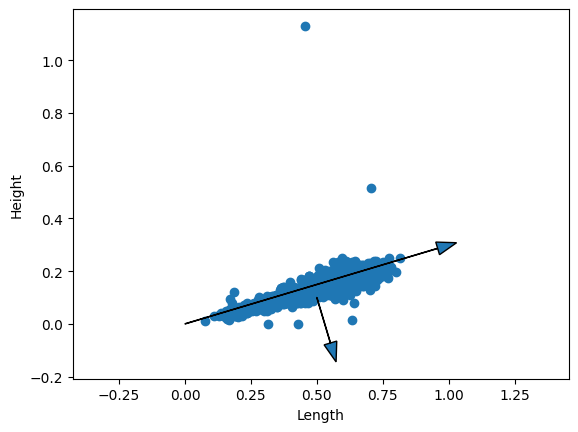

In [10]:
v0 = Vh[0,:]
v1 = (S[1])/(S[0]) * Vh[1,:]

fig, ax = plt.subplots()
plt.scatter(X[:,0], X[:,1])
ax.set_xlabel(data0.name)
ax.set_ylabel(data1.name)
ax.arrow(0, 0, v0[0], v0[1], head_width=0.05)
ax.arrow(0.5, 0.1,  v1[0], v1[1], head_width=0.05)
ax.set_aspect("equal", adjustable="datalim")
plt.show()

Next we rotate that data such that the new coordinate system aligns with the eigenvector in $V$, and produce a scatter plot using the new coordinates:

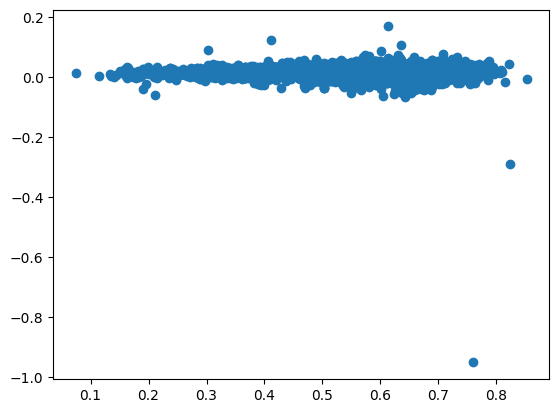

In [11]:
Xnew = X @ Vh
plt.scatter(Xnew[:,0], Xnew[:, 1])
plt.show()

In the original data, there appears to be to outliers with height greater than 0.4. Removing these from the data:

In [12]:
Xf = X[X[:,1]<0.4,:]
print("Filtered shape:", Xf.shape)

C = np.identity(Xf.shape[0]) - np.ones((Xf.shape[0], Xf.shape[0]))/ Xf.shape[0]
Xc = C @ Xf
U, S, Vh = np.linalg.svd(Xc)
print("Singular values:", S)

Filtered shape: (4175, 2)
Singular values: [8.08013978 1.04153812]


We see a reduction in the second singular value.

Checking visually that we excluded the two outliers:

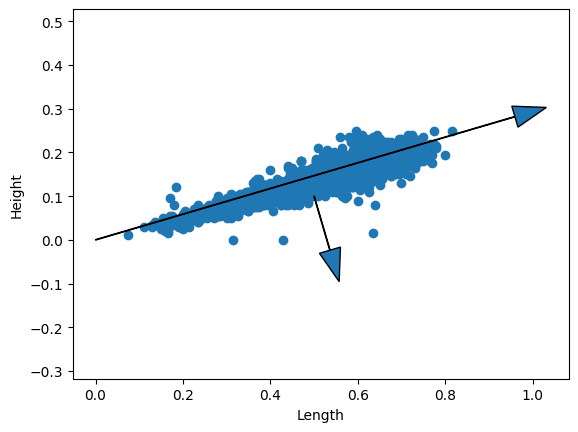

In [13]:
v0 = Vh[0,:]
v1 = (S[1])/(S[0]) * Vh[1,:]

fig, ax = plt.subplots()
plt.scatter(Xf[:,0], Xf[:,1])
ax.set_xlabel(data0.name)
ax.set_ylabel(data1.name)
ax.arrow(0, 0, v0[0], v0[1], head_width=0.05)
ax.arrow(0.5, 0.1,  v1[0], v1[1], head_width=0.05)
ax.set_aspect("equal", adjustable="datalim")
plt.show()